In [594]:
import pandas as pd
import numpy as np

## Importing File

In [595]:
from sklearn.datasets import make_moons
X,y = make_moons(250,random_state=19,noise=0.01) 

## Creating Affinity Matrix

In [597]:
sigma=0.2
A=np.zeros((X.shape[0],X.shape[0]))
def Af():
    for i in range(X.shape[0]):
        for j in range(X.shape[0]):
            if i!=j:
                A[i,j]=np.exp(-(sum((X[i]-X[j])**2))/(2*sigma**2))
            else:
                A[i,j]=0
    return A

## Defining Diagonal matrix and constructing Matrix L

In [598]:
Am=Af()
D=np.zeros((X.shape[0],X.shape[0]))
def Dig():
    for i in range(X.shape[0]):
        D[i,i]=sum(Am[i])**(-0.5)
    return D

Dm=Dig()
L=np.dot(Dm,Am).dot(Dm)

## Find the k largest eigenvectors and form x matrix using Eigenvectors

In [600]:
k=2
eigvals,eigvecs = np.linalg.eig(L)
x = eigvecs[:,:k]

## Form Y matrix from x 

In [601]:
Y=np.zeros(x.shape)
for i in range(x.shape[0]):
    Y[i]=x[i]/(sum(x[i]**2)**(0.5))

## Comparing using K-Means

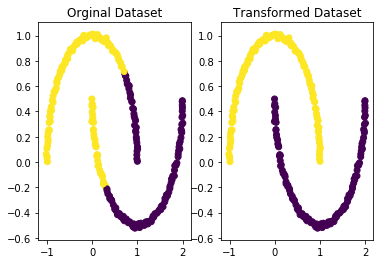

In [613]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = k)
clust = km.fit_predict(Y)
km1 = KMeans(n_clusters = k)
clust1 = km1.fit_predict(X)
import matplotlib.pyplot as plt
fig = plt.figure()
fig1= fig.add_subplot(121)
fig2=fig.add_subplot(122)
fig1.scatter(X[:,0],X[:,1],c=clust1)
fig2.scatter(X[:,0],X[:,1],c=clust)
fig1.set(title='Orginal Dataset')
fig2.set(title='Transformed Dataset')
plt.show()